In [1]:
import pandas as pd
import numpy as np

In [2]:
# use the second file
data1_1 = pd.read_csv("20220808-FULL-1_1.csv", sep=';')
# display the data
data1_1

C:\Users\JXN19\AppData\Local\Temp/ipykernel_31312/1951926038.py:2: DtypeWarning: Columns (5,36,86,89) have mixed types. Specify dtype option on import or set low_memory=False.
  data1_1 = pd.read_csv("20220808-FULL-1_1.csv", sep=';')


,fileGenerationDate,Entity_LogicalId,Entity_EU_ReferenceNumber,Entity_UnitedNationId,Entity_DesignationDate,Entity_DesignationDetails,Entity_Remark,Entity_SubjectType,Entity_SubjectType_ClassificationCode,Entity_Regulation_Type,...,Citizenship_LogicalId,Citizenship_RegulationLanguage,Citizenship_Remark,Citizenship_Regulation_Type,Citizenship_Regulation_OrganisationType,Citizenship_Regulation_PublicationDate,Citizenship_Regulation_EntryIntoForceDate,Citizenship_Regulation_NumberTitle,Citizenship_Regulation_Programme,Citizenship_Regulation_PublicationUrl
0,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08/08/2022,13,EU.27.28,NaN,NaN,NaN,(UNSC RESOLUTION 1483),P,person,regulation,...,1.0,EN,NaN,regulation,commission,2003-07-08,2003-07-07,1210/2003 (OJ L169),IRQ,http://eur-lex.europa.eu/LexUriServ/LexUriServ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21790,08/08/2022,143389,EU.8692.54,NaN,2022-07-21,NaN,(Date of UN designation: 2022-07-21),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21791,08/08/2022,143389,EU.8692.54,NaN,2022-07-21,NaN,(Date of UN designation: 2022-07-21),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21792,08/08/2022,143389,EU.8692.54,NaN,2022-07-21,NaN,(Date of UN designation: 2022-07-21),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21793,08/08/2022,143389,EU.8692.54,NaN,2022-07-21,NaN,(Date of UN designation: 2022-07-21),P,person,amendment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# get the whole name attribute
whole_name = data1_1['NameAlias_WholeName']

In [4]:
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''and D=='':
        s=1
    elif C=='':
        s=0
    elif D=='':
        s=1    
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s     

In [5]:
def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

In [6]:
len(whole_name)

21795

In [7]:
# so I replaced them with empty strings
whole_name.fillna('', inplace=True)
whole_name

0             Saddam Hussein Al-Tikriti
1                               Abu Ali
2                              Abou Ali
3                                      
4                                      
                      ...              
21790       Евгений Витальевич БАЛИЦКИЙ
21791    Yevgeniy Vitalievich BALYTSKIY
21792    Jevgenij Vitaljevitj BALITSKIJ
21793                                  
21794                                  
Name: NameAlias_WholeName, Length: 21795, dtype: object

In [8]:
import numpy as np
index = [i for i in range(len(whole_name))] # test_data为测试数据
np.random.shuffle(index) # 打乱索引
train_data = whole_name[index]

In [9]:
train_data

4462                         Mujahideen Youth Movement
2671        Al-Haramain Foundation (Union der Komoren)
676                             Revolucionarna ljevica
9359                                                  
13133    Islamic State of Iraq and the Levant of Yemen
                             ...                      
4151               General Department of Atomic Energy
8743                                                  
10437                                                 
13112                   Al-Sham and Al-Darwish Company
5923                                                  
Name: NameAlias_WholeName, Length: 21795, dtype: object

In [10]:
# calculate all the distances in whole_name
length_train =  int(0.1*len(whole_name))
Name = np.zeros((length_train,length_train))
for i in range(length_train):
    for j in range(i+1,length_train):
        Name[i][j]=distCPD(train_data[i],train_data[j])

In [11]:
Name

array([[0.        , 0.72571429, 0.7725    , ..., 0.5       , 0.5       ,
        0.93833333],
       [0.        , 0.        , 0.33035714, ..., 0.5       , 0.5       ,
        0.88690476],
       [0.        , 0.        , 0.        , ..., 0.5       , 0.5       ,
        0.89583333],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [12]:
Name.shape

(2179, 2179)

In [13]:
index

[4462,
 2671,
 676,
 9359,
 13133,
 20600,
 2652,
 2301,
 10367,
 12549,
 4792,
 13205,
 2871,
 18817,
 17373,
 6362,
 747,
 9805,
 12266,
 5042,
 12503,
 10511,
 20209,
 8817,
 12049,
 14389,
 12610,
 7901,
 3813,
 12388,
 7368,
 11644,
 7430,
 8215,
 19518,
 19014,
 5738,
 11760,
 10505,
 6871,
 20480,
 6545,
 4123,
 7626,
 17346,
 802,
 10286,
 14046,
 21469,
 20766,
 8546,
 17924,
 789,
 17470,
 2046,
 12232,
 20181,
 15278,
 19600,
 11700,
 17976,
 20467,
 485,
 3232,
 15287,
 4172,
 14173,
 13453,
 13506,
 18389,
 1465,
 2813,
 20216,
 6798,
 423,
 14367,
 14048,
 2706,
 20971,
 10285,
 10205,
 16029,
 7872,
 12479,
 13459,
 19721,
 11874,
 2386,
 4301,
 14717,
 12833,
 3100,
 18578,
 11449,
 7791,
 15918,
 927,
 15218,
 3465,
 4822,
 4063,
 7912,
 13671,
 9760,
 1622,
 4526,
 2766,
 15884,
 8772,
 10351,
 14181,
 11723,
 4420,
 12431,
 14235,
 13860,
 17473,
 1655,
 18327,
 9329,
 12269,
 4504,
 3538,
 7739,
 1850,
 11187,
 12806,
 5787,
 18874,
 8724,
 8862,
 8027,
 8855,
 1184

In [14]:
entity=data1_1['Entity_LogicalId']
entity

0            13
1            13
2            13
3            13
4            13
          ...  
21790    143389
21791    143389
21792    143389
21793    143389
21794    143389
Name: Entity_LogicalId, Length: 21795, dtype: int64

In [15]:
entity_train=[]
for i in range(length_train):
    entity_train.append(entity[index[i]])

In [16]:
label = np.zeros((length_train,length_train))
for i in range(length_train):
    for j in range(i+1,length_train):
        if entity_train[i]==entity_train[j]:
            label[i][j]=0
        else:
            label[i][j] =1
print(label)        

[[0. 1. 1. ... 1. 1. 1.]
 [0. 0. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
np.count_nonzero(label[1])

2176

In [18]:
len(set(entity_train))

1438

In [19]:
distlist=[]
for i in range(length_train):
    for j in range(i+1,length_train):
        if label[i][j]==0:
            distlist.append(Name[i][j])
print(distlist)            

[0.9259090909090909, 0.893125, 0.8366666666666667, 0.8063636363636364, 0.9299999999999999, 0.9007936507936507, 0.9157608695652174, 0.9239864864864865, 0.9175, 0.9213709677419355, 0.8541666666666667, 0.9097222222222222, 0.7840909090909092, 0.5, 0.9348484848484848, 0.5, 0.5, 0.5, 0.5, 0.5, 0.8310439560439561, 0.9107142857142857, 0.7387278582930756, 0.912962962962963, 0.9597423510466989, 0.8359788359788359, 0.7471264367816092, 0.9189814814814814, 0.5, 0.7309941520467836, 0.9414261460101867, 0.8310344827586207, 0.5, 1.0, 0.5, 0.5, 0.8923076923076922, 0.8710526315789473, 0.5, 0.5, 0.5, 0.9333333333333333, 0.9296536796536796, 0.9261904761904762, 0.8452380952380952, 0.8214285714285714, 0.9206349206349206, 0.5, 0.8898809523809523, 0.9449404761904762, 0.5, 0.9074074074074074, 0.9069264069264069, 0.5900621118012422, 0.9415584415584416, 0.5, 0.9116883116883117, 0.5, 0.5, 0.5, 0.5, 0.956439393939394, 0.5, 0.8792270531400965, 0.5, 1.0, 1.0, 1.0, 0.5, 0.9282608695652175, 0.8913043478260869, 0.791925

In [20]:
sum(distlist)/len(distlist)

0.7472457838526825

In [21]:
datasimple=[round(i,1) for i in distlist]
len(datasimple)

1457

In [22]:
def countnum(A,a):
    count=0
    for i in range(len(A)):
        if(A[i]==a):
            count=count+1
    return count       

In [23]:
numam=[]
for i in range(11):
    numam.append(countnum(datasimple,0+0.1*i))
print(numam)    

[0, 0, 0, 0, 2, 555, 0, 0, 161, 453, 246]


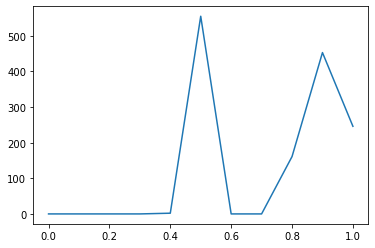

In [27]:
import matplotlib.pyplot as plt
x=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(x,numam)
plt.show()

In [24]:
Name.shape

(2179, 2179)

In [25]:
undistlist=[]
for m in range(length_train):
    for n in range(m+1,length_train):
        if label[m][n]==1:
            undistlist.append(Name[m][n])
print(len(undistlist)) 

2371474


In [26]:
undatasimple=[round(i,1) for i in undistlist]
undistam=[]
for i in range(11):
    undistam.append(countnum(undatasimple,0+0.1*i))
print(undistam)  

[70, 140, 302, 0, 1341, 1022281, 0, 0, 210799, 619337, 458600]


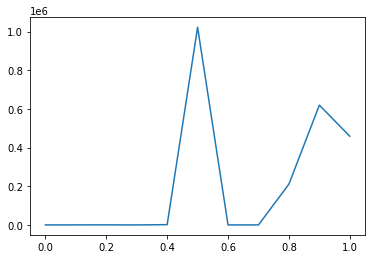

In [28]:
import matplotlib.pyplot as plt
x=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
plt.plot(x,undistam)
plt.show()